In [17]:
import pandas as pd
import numpy as np
import torch, os, cv2, torchvision
from torchvision import transforms as T
from PIL import Image
from glob import glob
import gdown
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, random_split

In [23]:
torch.manual_seed(2024)
class CustomDataset(Dataset):
    def __init__(self, root, data_type, transformations =None):
        super(). __init__()
        
        
        self.transformations = transformations
        self.im_paths =[im_path for im_path in sorted(glob(f"{root}/{data_type}/*/*.jpg"))] 
        
      
        self.cls_names ={}
        self.labels =[]


        for idx, im_path in enumerate(self.im_paths):
            lablel = self.get_class_name(im_path)
            self.labels.append(lablel)
            self.uniq_class = [c for c in np.unique(list(self.labels))]
            self.cls_names = {keys: values for values, keys in enumerate(self.uniq_class)}

    def get_class_name(self, path):
        return os.path.dirname(path).split("\\")[-1].lower()
    
    def __len__(self): 
        return len(self.im_paths)
    
    
    
    def __getitem__(self, idx):
        
        im_p = self.im_paths[idx]
        
        im = Image.open(im_p).convert("RGB")  
        
        gt = self.cls_names[self.get_class_name(im_p)]
        
    
        if self.transformations is not None: im =self.transformations(im)
        
        
        return im, gt 
transformer = T.Compose([T.Resize((224, 224)),
                        T.ToTensor()])
root= "music"
train_data = CustomDataset(root=root,  data_type="train", transformations =transformer)
test_data = CustomDataset(root=root,  data_type="test", transformations =transformer) 
val_data = CustomDataset(root=root,  data_type="valid", transformations =transformer) 
class_names = train_data.cls_names

train_data[10]

# print(len(train_data))
# print(len(test_data))
# print(len(val_data))
# print(class_names)

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [24]:
# Dataloader
bs = 8
num_work = 0
tr_dl = DataLoader(train_data, batch_size=bs, shuffle=True, num_workers=num_work)
ts_dl = DataLoader(test_data , shuffle=False, num_workers=num_work)
val_dl = DataLoader(val_data, batch_size=bs, shuffle=False, num_workers=num_work)


print(f"Train data len    ->{len(tr_dl)}")
print(f"Test data len     ->{len(ts_dl)}")
print(f"Valid data len    ->{len(val_dl)}")

Train data len    ->600
Test data len     ->150
Valid data len    ->19


['acordian', 'alphorn', 'bagpipes', 'banjo', 'bongo drum', 'casaba', 'castanets', 'clarinet', 'clavichord', 'concertina', 'didgeridoo', 'drums', 'dulcimer', 'flute', 'guiro', 'guitar', 'harmonica', 'harp', 'marakas', 'ocarina', 'piano', 'saxaphone', 'sitar', 'steel drum', 'tambourine', 'trombone', 'trumpet', 'tuba', 'violin', 'xylophone']


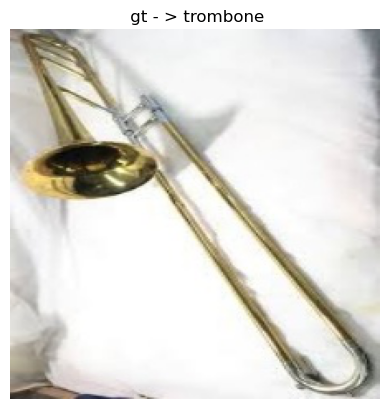

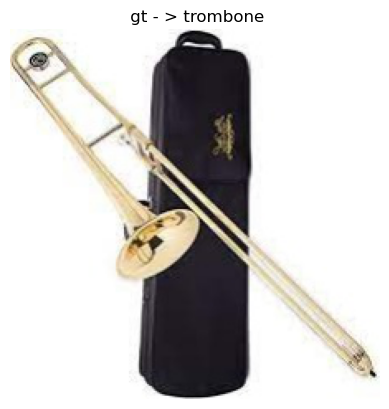

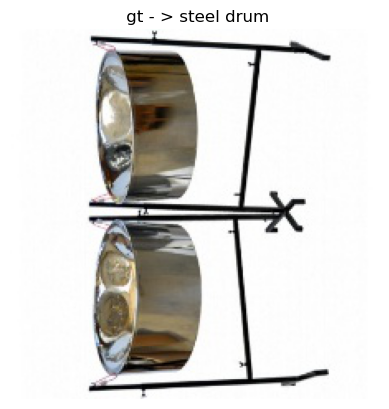

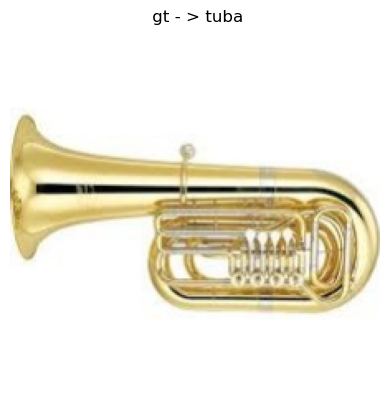

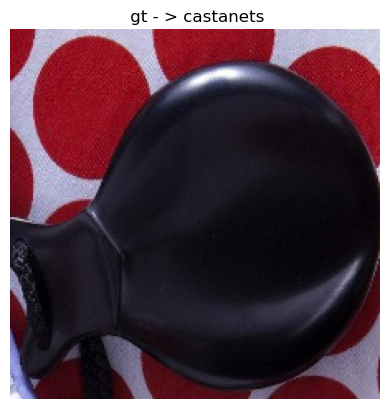

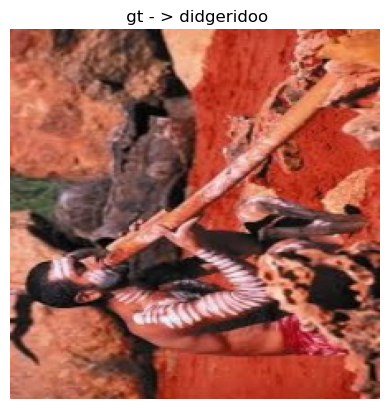

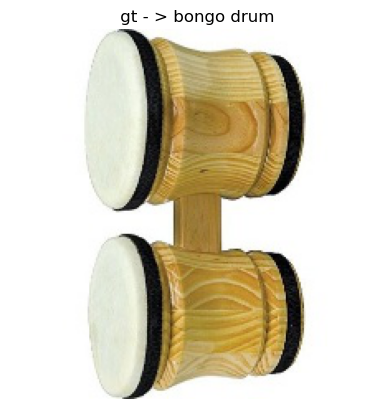

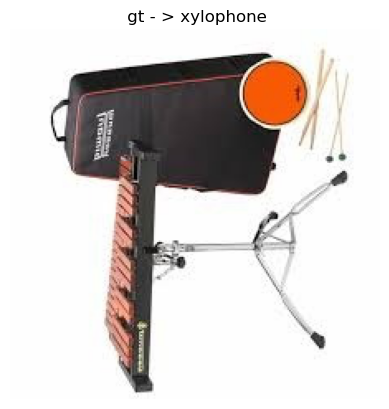

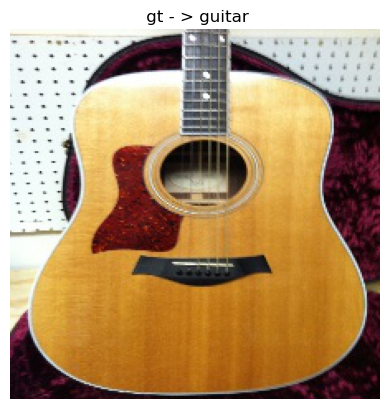

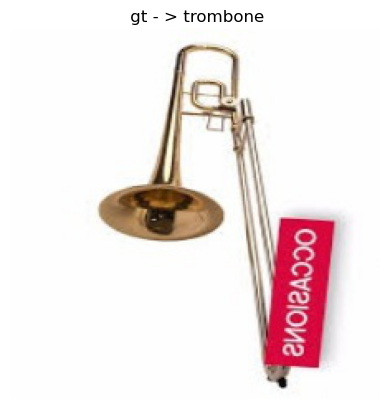

In [6]:
import random
from matplotlib import pyplot as plt

class_name = list(train_data.cls_names.keys())
print(class_name)

data_soni =10
index = [random.randint(0, len(train_data)-1) for _ in range(data_soni)]
for idx, ideks in enumerate(index):
    im, gt = train_data[ideks]

    plt.imshow((im*255).cpu().permute(2,1,0).numpy().astype("uint8"))
    plt.axis("off")
    plt.title(f" gt - > {class_name[gt]}")
    plt.show()

In [25]:
!pip install timm


In [26]:
import timm, torch

model = timm.create_model(model_name = "rexnet_150", pretrained =True, num_classes = len(class_names))
model.eval()

RexNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (features): Sequential(
    (0): LinearBottleneck(
      (conv_dw): ConvNormAct(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn): BatchNormAct2d(
          48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (act_dw): ReLU6()
      (conv_pwl): ConvNormAct(
        (conv): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
    )
    (1): LinearBottlene

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =  model.parameters(), lr=0.001)

model.to(device)

RexNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (features): Sequential(
    (0): LinearBottleneck(
      (conv_dw): ConvNormAct(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn): BatchNormAct2d(
          48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (act_dw): ReLU6()
      (conv_pwl): ConvNormAct(
        (conv): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
    )
    (1): LinearBottlene

In [10]:
import torch.multiprocessing as mp


In [11]:
from tqdm import tqdm
def train(model, tr_dl, val_dl, epochs, device, loss_fn, opt, save_prefix):
  tr_acc_sc_ = []
  val_acc_sc_, val_epoc_loss_ = [],[]
  best_loss = np.inf
  decrease, not_improve, early_stop_threshold= 1,0,5

  print("Train is starting .....")

  for epoc in range(epochs):
      print(f"{epoc+1}- epoc is starting..")
      count=0
      tr_acc_sr, tr_total =0,0

      for idx, batch in (enumerate(tqdm(tr_dl))):
          ims, gts = batch
          ims = ims.to(device)
          gts = gts.to(device)
      
          pred = model(ims)

          loss = loss_fn(pred, gts)

          tr_total+=ims.shape[0]
          pred_class = torch.argmax(pred.data, dim =1)
          tr_acc= (pred_class==gts).sum().item()
          tr_acc_sr+=tr_acc
          opt.zero_grad()
          loss.backward()
          opt.step()

      model.eval()
      with torch.no_grad():
          val_acc_sc = 0
          val_total =0
          val_epoc_loss = 0

          for idx, batch in enumerate(tqdm(val_dl)):
              ims, gts = batch
              ims, gts = ims.to(device), gts.to(device)

              val_total+=ims.shape[0]
            
              pred = model(ims)


              pred_class = torch.argmax(pred, dim=1)
              a =(pred_class==gts).sum().item()
              val_acc_sc+=a
              loss = loss_fn(pred, gts)
              val_epoc_loss+=loss.item()

              

          tr_ACC_SR = tr_acc_sr/tr_total
          VAL_acc_sc = val_acc_sc/val_total
          VAL_epoc_loss = val_epoc_loss/len(val_dl)


          print(f"{epoc+1} is finished..")
          print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
          print(f"{epoc+1} - epoc result:\n")
          print(f"{epoc+1}- epoc Train Accurancy score        -> {tr_ACC_SR:.3f}")
          print(f"{epoc+1}- epoc Validation Accurancy score   -> {VAL_acc_sc:.3f}")
          print(f"{epoc+1}- epoc Validation loss score        -> {VAL_epoc_loss:.3f}\n\n")



          tr_acc_sc_.append(tr_ACC_SR)
          val_acc_sc_.append(VAL_acc_sc)
          val_epoc_loss_.append(VAL_epoc_loss)

          # print(type(best_loss))

          if VAL_epoc_loss < best_loss:
              os.makedirs("best_model_musics", exist_ok=True)
              best_loss = VAL_epoc_loss
              torch.save(model, f"best_model/{save_prefix}_best_model.pth")

  return {"tr_acc_sc": tr_acc_sc_, "val_acc_sc": val_acc_sc_, "val_epoc_loss": val_epoc_loss_}

In [12]:
result = train(model=model, tr_dl=tr_dl, val_dl=val_dl, epochs=10, device=device,
               loss_fn=loss_fn, opt=optimizer, save_prefix="musics")

Train is starting .....
1- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 30.99it/s]


1 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 - epoc result:

1- epoc Train Accurancy score        -> 0.695
1- epoc Validation Accurancy score   -> 0.967
1- epoc Validation loss score        -> 0.144


2- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 46.11it/s]


2 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 - epoc result:

2- epoc Train Accurancy score        -> 0.939
2- epoc Validation Accurancy score   -> 0.973
2- epoc Validation loss score        -> 0.091


3- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 45.44it/s]


3 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3 - epoc result:

3- epoc Train Accurancy score        -> 0.971
3- epoc Validation Accurancy score   -> 0.960
3- epoc Validation loss score        -> 0.104


4- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 39.82it/s]


4 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4 - epoc result:

4- epoc Train Accurancy score        -> 0.990
4- epoc Validation Accurancy score   -> 0.987
4- epoc Validation loss score        -> 0.036


5- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 40.76it/s]


5 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5 - epoc result:

5- epoc Train Accurancy score        -> 0.996
5- epoc Validation Accurancy score   -> 0.973
5- epoc Validation loss score        -> 0.095


6- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 42.94it/s]


6 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
6 - epoc result:

6- epoc Train Accurancy score        -> 0.999
6- epoc Validation Accurancy score   -> 0.987
6- epoc Validation loss score        -> 0.030


7- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 40.08it/s]


7 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
7 - epoc result:

7- epoc Train Accurancy score        -> 1.000
7- epoc Validation Accurancy score   -> 0.993
7- epoc Validation loss score        -> 0.019


8- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 41.45it/s]


8 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
8 - epoc result:

8- epoc Train Accurancy score        -> 1.000
8- epoc Validation Accurancy score   -> 0.987
8- epoc Validation loss score        -> 0.029


9- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 44.75it/s]


9 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
9 - epoc result:

9- epoc Train Accurancy score        -> 1.000
9- epoc Validation Accurancy score   -> 0.993
9- epoc Validation loss score        -> 0.022


10- epoc is starting..


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 43.17it/s]

10 is finished..
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
10 - epoc result:

10- epoc Train Accurancy score        -> 1.000
10- epoc Validation Accurancy score   -> 0.993
10- epoc Validation loss score        -> 0.019




In [14]:
# Viziualization 

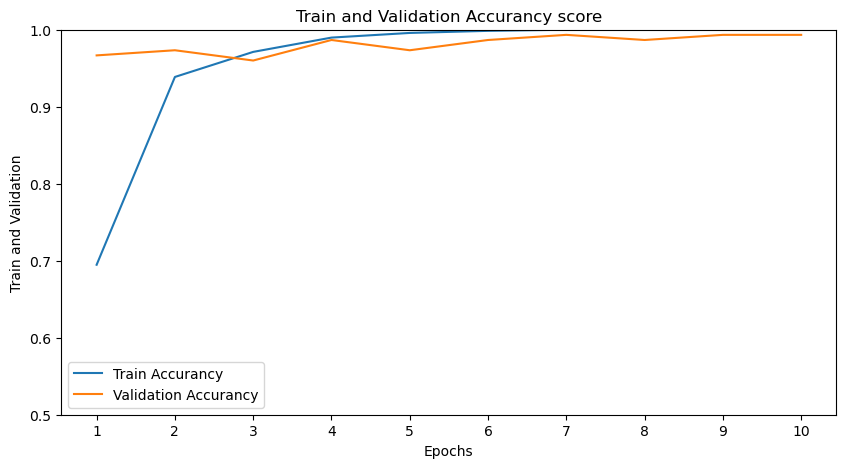

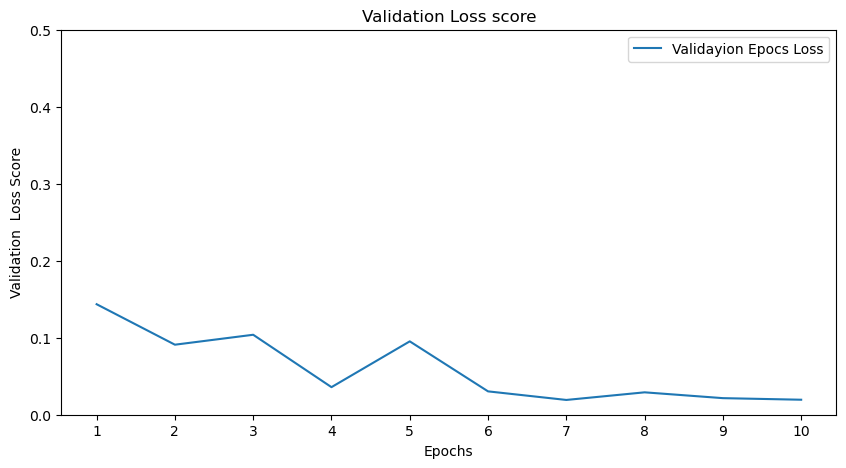

In [22]:
class Plot():
    def __init__(self, res):


        plt.figure(figsize=(10, 5))
        plt.plot(res["tr_acc_sc"], label = "Train Accurancy")
        plt.plot(res['val_acc_sc'], label = "Validation Accurancy")
        plt.title("Train and Validation Accurancy score")
        plt.xlabel("Epochs")
        plt.xticks(np.arange(len(res["val_acc_sc"])), [i for i in range(1, len(res["val_acc_sc"])+1)])
        plt.ylabel("Train and Validation")
        plt.ylim(0.5 ,1)
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(res["val_epoc_loss"], label = "Validayion Epocs Loss")
        plt.title("Validation Loss score")
        plt.xlabel("Epochs")
        plt.xticks(np.arange(len(res["val_epoc_loss"])), [i for i in range(1, len(res["val_epoc_loss"])+1)])
        plt.ylabel("Validation  Loss Score")
        plt.ylim(0, 0.5)
        plt.legend()
        plt.show()


Plot(result)

In [ ]:
{"tr_acc_sc": tr_acc_sc_, "val_acc_sc": val_acc_sc_, "val_epoc_loss": val_epoc_loss_}

`Inferemnce`

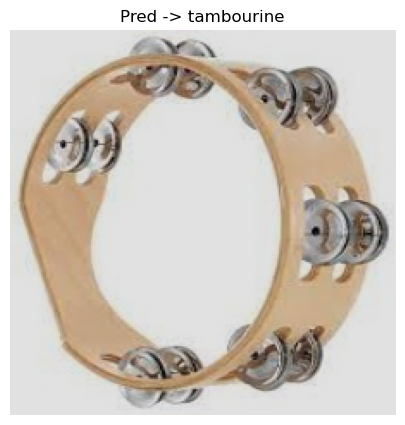

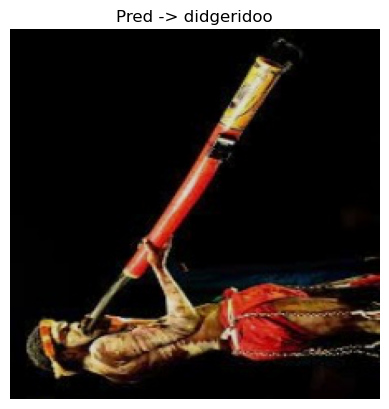

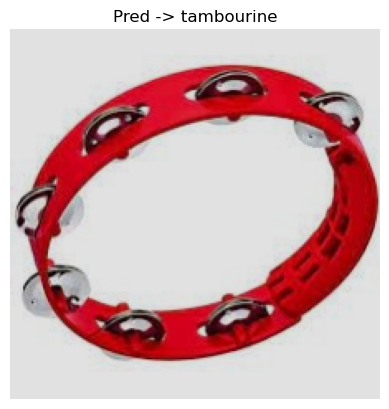

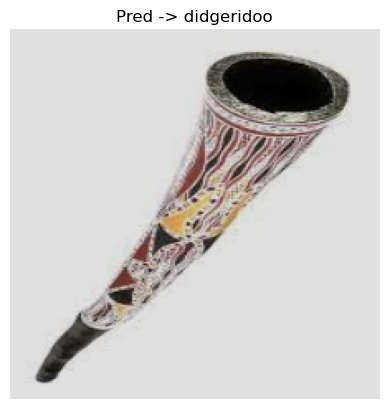

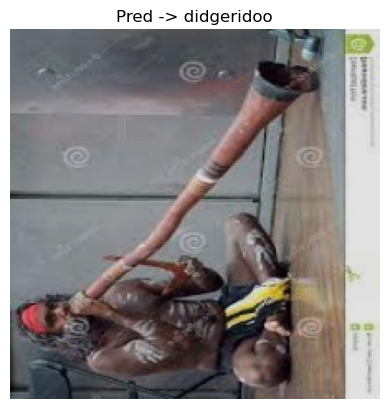

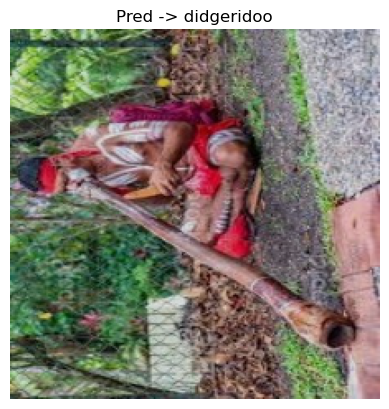

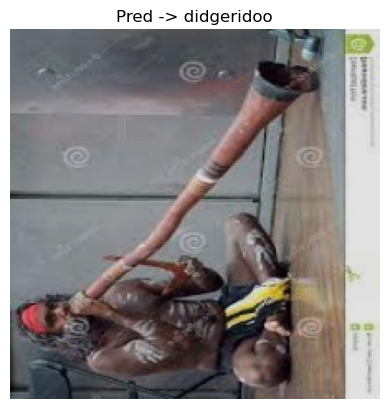

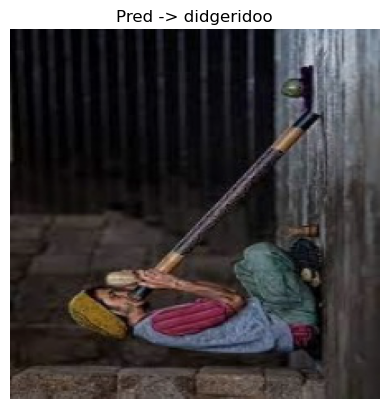

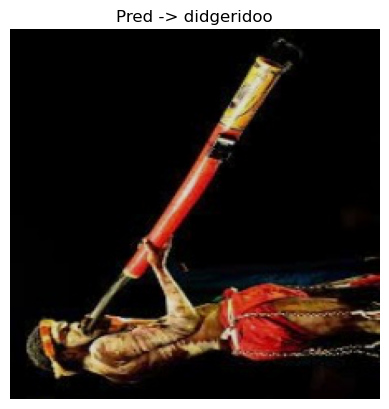

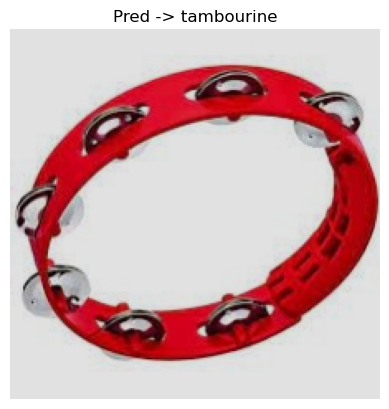

In [54]:
import random
def inference(data, model, device,  im_number, class_name = None):
    images, predics =[], []

    for idx, batch in enumerate(data):
        if idx == 10: break

        im = batch
        images.append(im)
        pred = torch.argmax(model(im[0].unsqueeze(dim = 0).to(device)), dim = 1)
        predics.append(pred)

    plt.figure(figsize=(10,5))
    idxs = [random.randint(0, len(images)-1) for _ in range(im_number)]
    for idx, index in enumerate(idxs):
        im = images[index]

        plt.imshow((im[0].cpu()*225).permute(2, 1, 0).numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Pred -> {class_name[predics[index]]}")
        plt.show()

 
            
model = torch.load("best_model/musics_best_model.pth")
inference(data = test_data, model = model.to(device), device = device, im_number= 10, class_name = list(class_names.keys()))

`Test with others images`

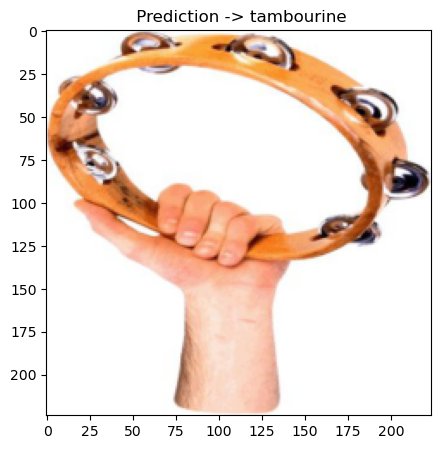

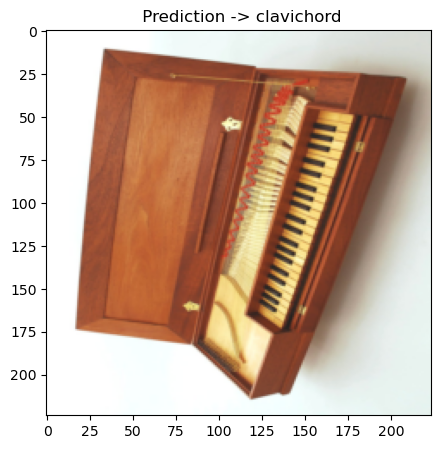

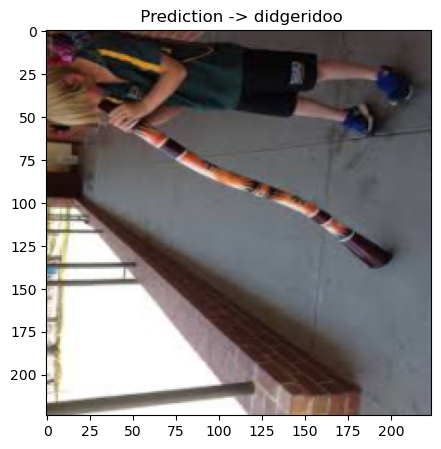

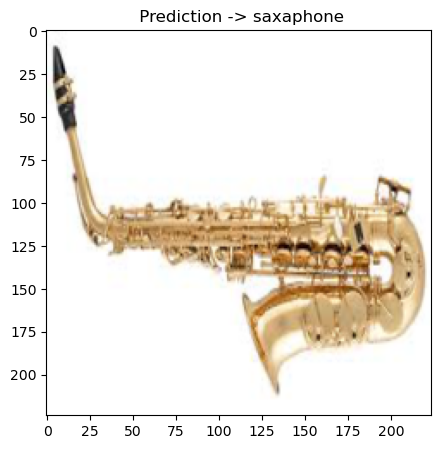

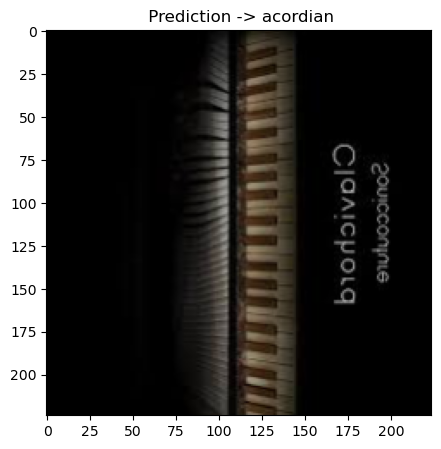

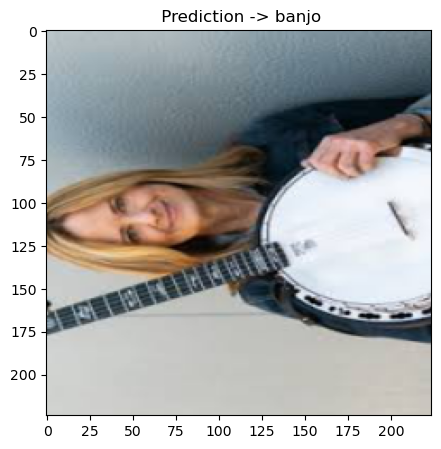

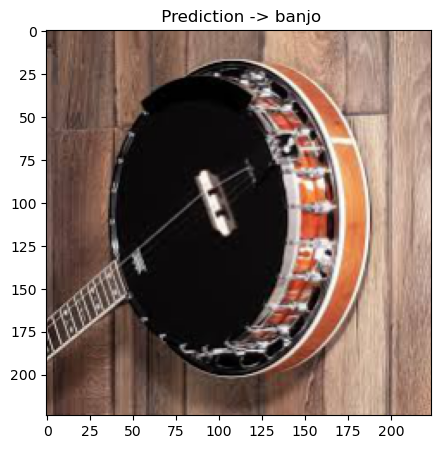

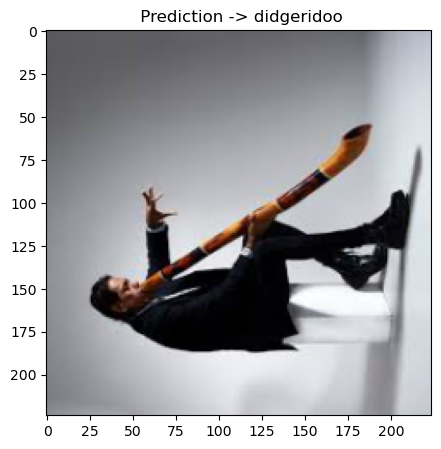

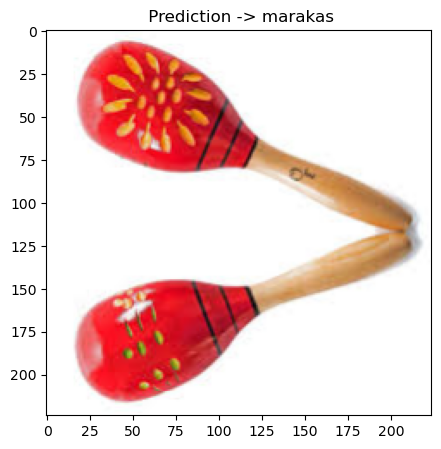

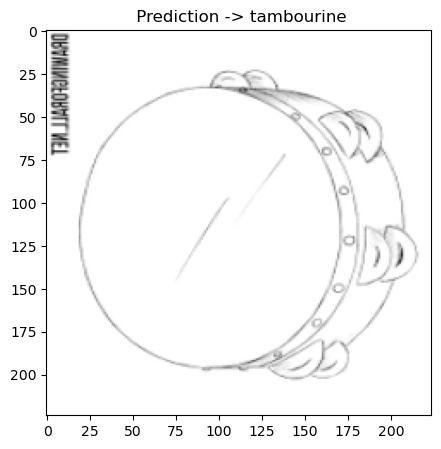

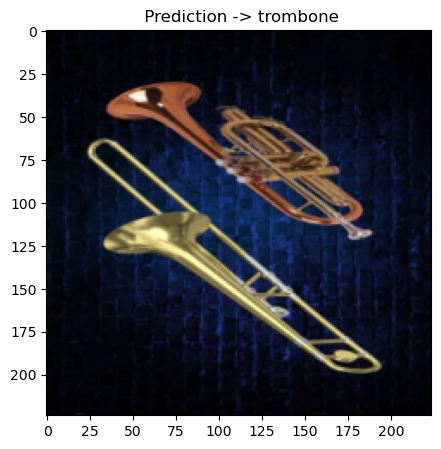

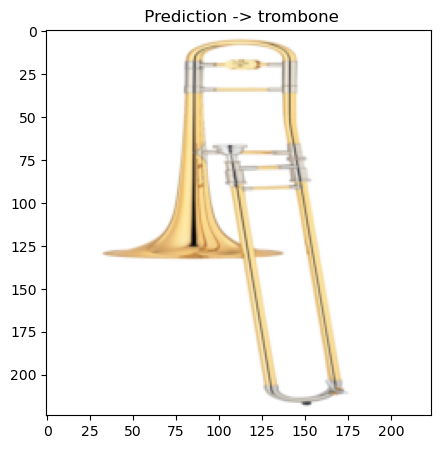

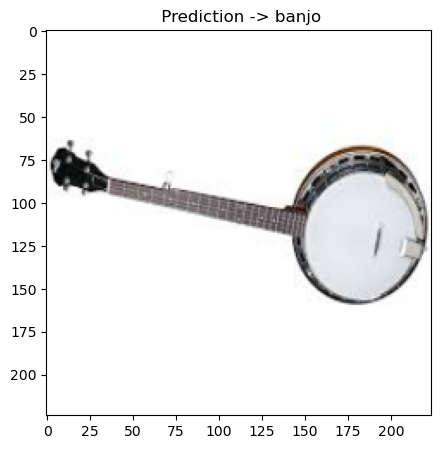

In [70]:
from PIL import Image
from torchvision import transforms as T
import torch
import matplotlib.pyplot as plt
from glob import glob

def process_images_and_predict(model, device, root="ims", file_types=['.jpg', '.png', '.jpeg']):
    images, predicts = [], []
    im_paths = glob(f"{root}/*[{file_t for file_t in file_types}]")

    for idx, batch in enumerate(im_paths):
        im = Image.open(batch).convert("RGB")
        transformer = T.Compose([
            T.Resize((224, 224)),
            T.ToTensor()])
        im_tensor = transformer(im)
        images.append(im_tensor)

        pred = torch.argmax(model(im_tensor.unsqueeze(dim=0).to(device)), dim=1).item()
        predicts.append(pred)

        plt.figure(figsize=(10, 5))
        plt.imshow((im_tensor * 255).cpu().permute(2, 1, 0).numpy().astype("uint8"))
        plt.title(f" Prediction -> {list(class_names.keys())[pred]}")
        plt.show()

# Assuming you have 'model' and 'class_names' defined earlier
process_images_and_predict(model, device, root="ims", file_types=['.jpg', '.png', '.jpeg'])
